<a href="https://colab.research.google.com/github/Mohammed0Arfath/Qiskit_single_qubit_gates/blob/main/Qiskit_single_qubit_gates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qiskit qiskit-aer --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.6 MB/s eta 0:00:00


In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

# Initialize simulator
sim = AerSimulator()

# Create a single-qubit circuit with one classical bit
qc = QuantumCircuit(1, 1)

# --- Apply sequence of single-qubit gates ---
qc.x(0)        # Pauli-X (NOT gate)
qc.h(0)        # Hadamard (superposition)
qc.s(0)        # Phase gate (π/2)
qc.t(0)        # T gate (π/4)
qc.rz(0.5, 0)  # Z-axis rotation by 0.5 radians

# Measure final state
qc.measure_all()

# Display circuit
print("Quantum Circuit:")
print(qc.draw())

# --- Run simulation ---
compiled = transpile(qc, sim)
result = sim.run(compiled, shots=1024).result()

# --- Display results ---
counts = result.get_counts()
print("\nMeasurement Counts:", counts)


Quantum Circuit:
        ┌───┐┌───┐┌───┐┌───┐┌─────────┐ ░ ┌─┐
     q: ┤ X ├┤ H ├┤ S ├┤ T ├┤ Rz(0.5) ├─░─┤M├
        └───┘└───┘└───┘└───┘└─────────┘ ░ └╥┘
   c: 1/═══════════════════════════════════╬═
                                           ║ 
meas: 1/═══════════════════════════════════╩═
                                           0 

Measurement Counts: {'0 0': 523, '1 0': 501}


# --------------------------------
# **Author:** Arfath
# **Objective:** Demonstrate effects of single-qubit gates on quantum states
# **Tasks:** Gate order, rotation angle, gate removal
# --------------------------------

In [20]:

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit.quantum_info import Statevector
from math import pi
import matplotlib.pyplot as plt


# Initialize simulator
sim = AerSimulator()


In [23]:
def run_single_qubit_experiment(gate_sequence_desc, build_fn):
    print(f"\n🧩 Running: {gate_sequence_desc}")
    qc = QuantumCircuit(1, 1)

    # Build circuit using custom function
    build_fn(qc)

    # Capture state BEFORE measurement (for Bloch sphere)
    state = Statevector(qc)

    # Add measurement AFTER saving state
    qc.measure_all()

    # Simulate
    compiled = transpile(qc, sim)
    result = sim.run(compiled, shots=1024).result()
    counts = result.get_counts()

    # Display circuit + counts
    print(qc.draw())
    print("Measurement Counts:", counts)

    # Plot histogram
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    plot_histogram(counts, ax=ax[0])
    ax[0].set_title("Measurement Probabilities")

    # Plot Bloch sphere (new method — returns a figure)
    bloch_fig = plot_bloch_multivector(state)
    bloch_ax = bloch_fig.axes[0]
    bloch_ax.set_title("Bloch Sphere Representation")

    # Merge both plots into one figure for display
    plt.show()



🧩 Running: Default Gate Order (X → H → S → T → RZ(0.5))
        ┌───┐┌───┐┌───┐┌───┐┌─────────┐ ░ ┌─┐
     q: ┤ X ├┤ H ├┤ S ├┤ T ├┤ Rz(0.5) ├─░─┤M├
        └───┘└───┘└───┘└───┘└─────────┘ ░ └╥┘
   c: 1/═══════════════════════════════════╬═
                                           ║ 
meas: 1/═══════════════════════════════════╩═
                                           0 
Measurement Counts: {'1 0': 525, '0 0': 499}


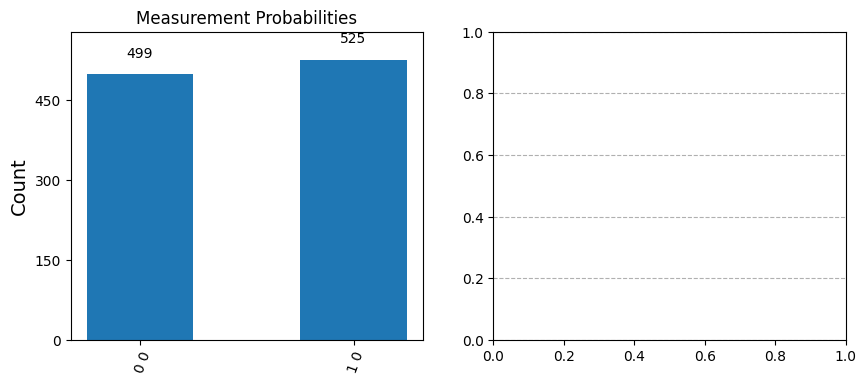

In [24]:


# =========================================================
# 🧪 TASK 1: Default Gate Sequence
# =========================================================
def default_sequence(qc):
    qc.x(0)        # Pauli-X (NOT)
    qc.h(0)        # Hadamard
    qc.s(0)        # Phase π/2
    qc.t(0)        # Phase π/4
    qc.rz(0.5, 0)  # Rotation around Z-axis (0.5 radians)

run_single_qubit_experiment("Default Gate Order (X → H → S → T → RZ(0.5))", default_sequence)




🧩 Running: Swapped Gate Order (H → X → S → T → RZ(0.5))
        ┌───┐┌───┐┌───┐┌───┐┌─────────┐ ░ ┌─┐
     q: ┤ H ├┤ X ├┤ S ├┤ T ├┤ Rz(0.5) ├─░─┤M├
        └───┘└───┘└───┘└───┘└─────────┘ ░ └╥┘
   c: 1/═══════════════════════════════════╬═
                                           ║ 
meas: 1/═══════════════════════════════════╩═
                                           0 
Measurement Counts: {'0 0': 506, '1 0': 518}


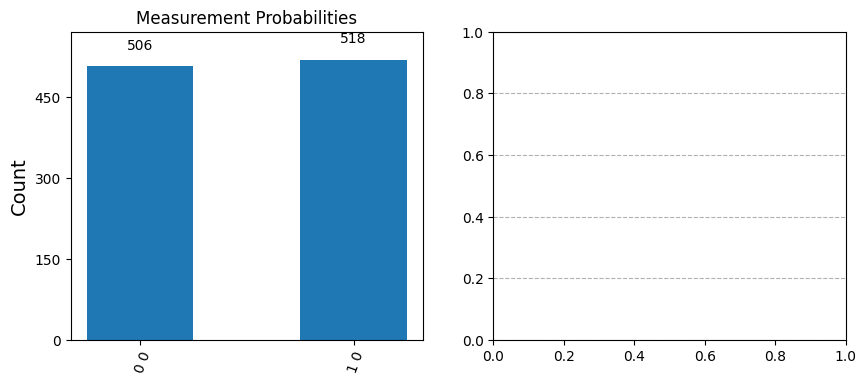

In [8]:

# =========================================================
# 🧪 TASK 2: Swap Gate Order (H before X)
# =========================================================
def swapped_sequence(qc):
    qc.h(0)
    qc.x(0)
    qc.s(0)
    qc.t(0)
    qc.rz(0.5, 0)

run_single_qubit_experiment("Swapped Gate Order (H → X → S → T → RZ(0.5))", swapped_sequence)





🧩 Running: Vary RZ Angle θ=0.79 radians
        ┌───┐┌───┐┌───┐┌───┐┌─────────┐ ░ ┌─┐
     q: ┤ X ├┤ H ├┤ S ├┤ T ├┤ Rz(π/4) ├─░─┤M├
        └───┘└───┘└───┘└───┘└─────────┘ ░ └╥┘
   c: 1/═══════════════════════════════════╬═
                                           ║ 
meas: 1/═══════════════════════════════════╩═
                                           0 
Measurement Counts: {'0 0': 508, '1 0': 516}


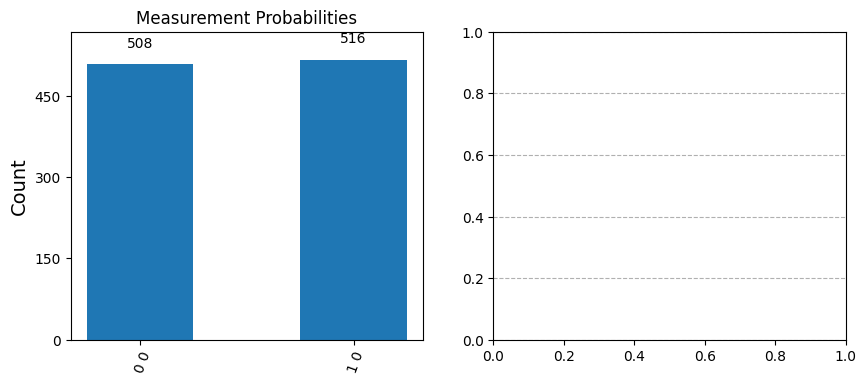


🧩 Running: Vary RZ Angle θ=1.57 radians
        ┌───┐┌───┐┌───┐┌───┐┌─────────┐ ░ ┌─┐
     q: ┤ X ├┤ H ├┤ S ├┤ T ├┤ Rz(π/2) ├─░─┤M├
        └───┘└───┘└───┘└───┘└─────────┘ ░ └╥┘
   c: 1/═══════════════════════════════════╬═
                                           ║ 
meas: 1/═══════════════════════════════════╩═
                                           0 
Measurement Counts: {'1 0': 500, '0 0': 524}


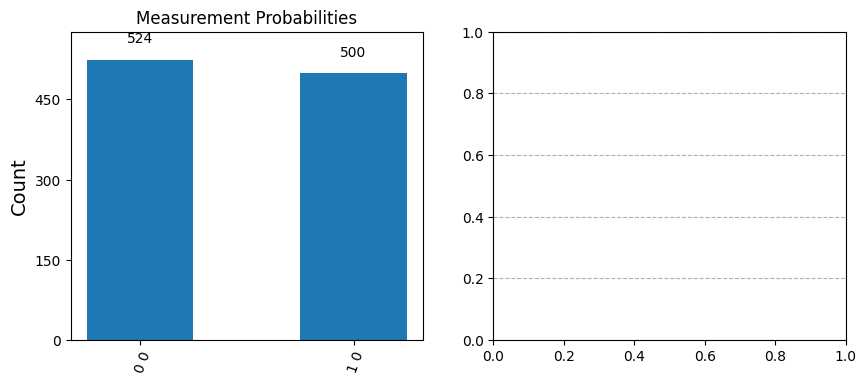


🧩 Running: Vary RZ Angle θ=3.14 radians
        ┌───┐┌───┐┌───┐┌───┐┌───────┐ ░ ┌─┐
     q: ┤ X ├┤ H ├┤ S ├┤ T ├┤ Rz(π) ├─░─┤M├
        └───┘└───┘└───┘└───┘└───────┘ ░ └╥┘
   c: 1/═════════════════════════════════╬═
                                         ║ 
meas: 1/═════════════════════════════════╩═
                                         0 
Measurement Counts: {'1 0': 496, '0 0': 528}


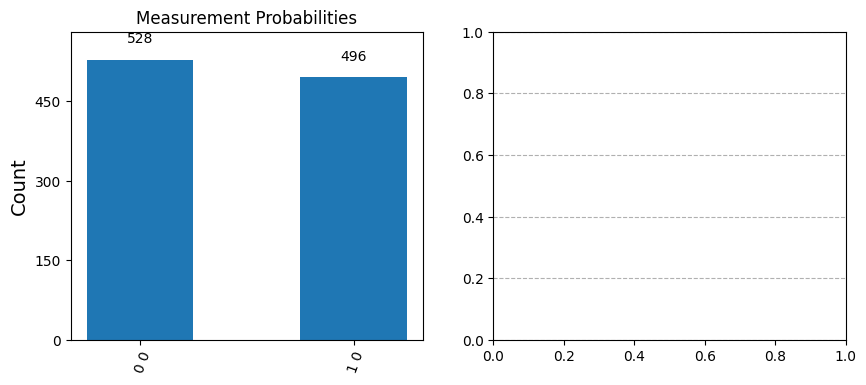

In [9]:
# =========================================================
# 🧪 TASK 3: Vary Rotation Angles
# =========================================================
for theta in [pi/4, pi/2, pi]:
    def rotation_experiment(qc, angle=theta):
        qc.x(0)
        qc.h(0)
        qc.s(0)
        qc.t(0)
        qc.rz(angle, 0)

    run_single_qubit_experiment(f"Vary RZ Angle θ={theta:.2f} radians", rotation_experiment)




🧩 Running: Removed Hadamard Gate
        ┌───┐┌───┐┌───┐┌─────────┐ ░ ┌─┐
     q: ┤ X ├┤ S ├┤ T ├┤ Rz(0.5) ├─░─┤M├
        └───┘└───┘└───┘└─────────┘ ░ └╥┘
   c: 1/══════════════════════════════╬═
                                      ║ 
meas: 1/══════════════════════════════╩═
                                      0 
Measurement Counts: {'1 0': 1024}


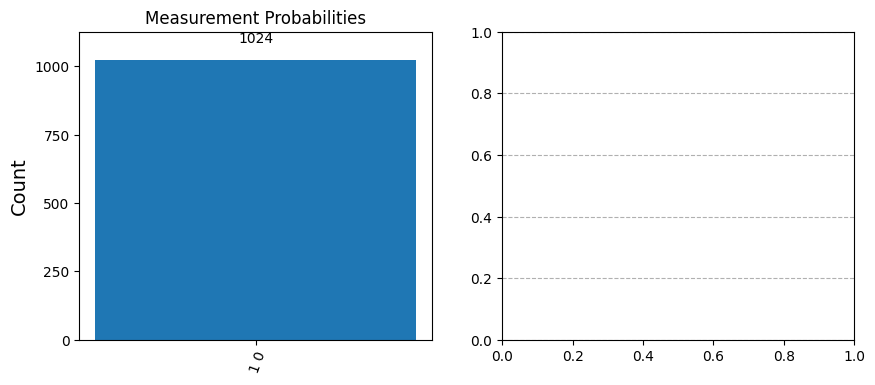

In [10]:

# =========================================================
# 🧪 TASK 4: Remove the Hadamard Gate
# =========================================================
def without_hadamard(qc):
    qc.x(0)
    qc.s(0)
    qc.t(0)
    qc.rz(0.5, 0)

run_single_qubit_experiment("Removed Hadamard Gate", without_hadamard)